In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [12]:
# Параметры
L = 10 # Длина отрезка
T = 1 # Время моделирования
alpha = 1 # Коэффициент теплопроводности
Nx = 50 # Число узлов по x
Nt = 100 # Число узлов по t

In [13]:
# Шаги
h = L / Nx
tau = T / Nt
lambda_ = (alpha * tau) / h**2
print(f'lambda = {lambda_}')

lambda = 0.24999999999999994


###Решение прямой задачи для одномерного уравнения теплопроводности

In [30]:
# Проверка устойчивости
if lambda_ > 0.5:
  raise ValueError("Схема неустойчива! Уменьшите tau.")

In [31]:
# Создание сетки
x = np.linspace(0, L, Nx+1)
t = np.linspace(0, T, Nt+1)

In [32]:
# Начальное условие
u = np.zeros((Nx+1, Nt+1))
#u[:, 0] = np.sin(np.pi * x)
u[:, 0] = np.where((x >= 5), 1, 0)

In [33]:
# Явная схема
for n in range(Nt):
  for i in range(1, Nx):
    u[i, n+1] = u[i, n] + lambda_ * (u[i+1, n] - 2*u[i, n] + u[i-1, n])
  # Граничные условия
  u[0, n+1] = 0
  u[Nx, n+1] = 0

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))

line, = ax.plot([], [], label='u(x, t)')
ax.set_xlabel('x')
ax.set_ylabel('u(x, t)')
ax.set_title('Решение уравнения теплопроводности')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(u.min()-1, u.max()+1)
ax.grid()
ax.legend()


def animate(n):
    line.set_data(x, u[:, n])
    return line,

plt.close()

ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=50, blit=True)

display(HTML(ani.to_jshtml()))

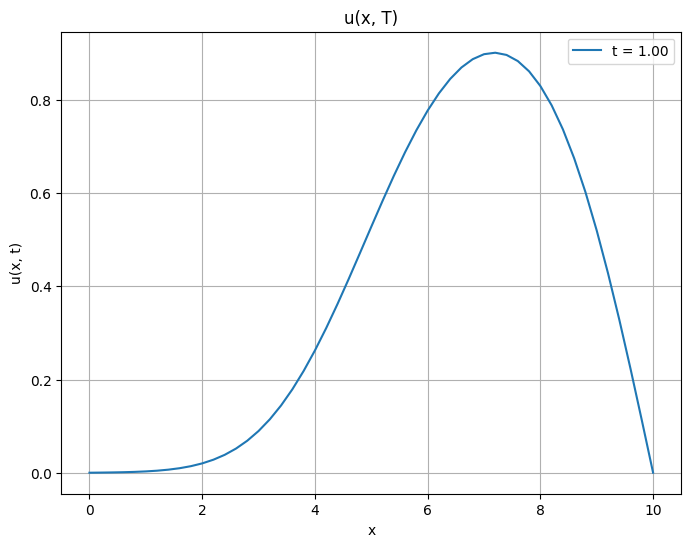

In [75]:
# Визуализация
plt.figure(figsize=(8, 6))
plt.plot(x, u[:, Nt], label=f't = {t[Nt]:.2f}')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.title('u(x, T)')
plt.legend()
plt.grid()
plt.show()

###Решение обратной задачи для одномерного уравнения теплопроводности

In [61]:
# Начальное условие
u_backward = np.zeros((Nx+1, Nt+1))
u_backward[:, -1] = u[:, -1]

In [64]:
# Создание сетки
x_backward = np.linspace(0, L, Nx+1)
t_backward = np.linspace(0, T, Nt+1)

In [67]:
# Явная схема для обратной задачи
for n in range(Nt, 0, -1):
   for i in range(1, Nx):
        u_backward[i, n-1] = u_backward[i, n] + lambda_ * (u_backward[i+1, n] - 2 * u_backward[i, n] + u_backward[i-1, n])

   u_backward[0, n-1] = 0
   u_backward[Nx, n-1] = 0

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))

line, = ax.plot([], [], label='u(x, t)')
ax.set_xlabel('x')
ax.set_ylabel('u(x, t)')
ax.set_title('Решение обратной задачи для уравнения теплопроводности')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(u_backward.min()-1, u_backward.max()+1)
ax.grid()
ax.legend()


def animate(n):
  line.set_data(x, u_backward[:, n])
  return line,

plt.close()

ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=50, blit=True)

display(HTML(ani.to_jshtml()))

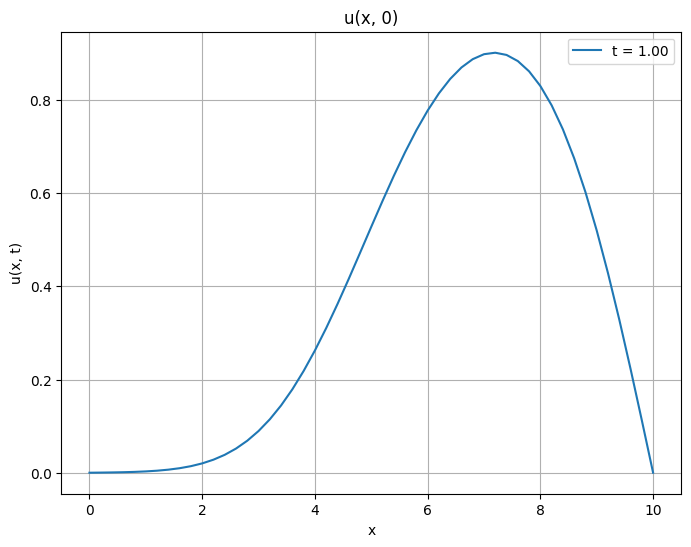

In [82]:
# Визуализация
plt.figure(figsize=(8, 6))
plt.plot(x, u_backward[:, -1], label=f't = {t[-1]:.2f}')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.title('u(x, 0)')
plt.legend()
plt.grid()
plt.show()

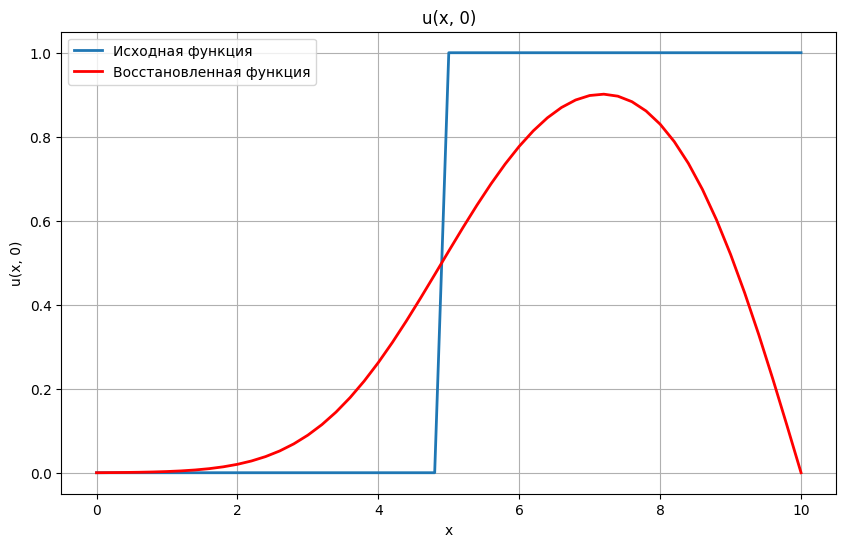

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(x, u[:, 0], label='Исходная функция', linewidth=2)
plt.plot(x, u_backward[:, -1], label='Восстановленная функция', linewidth=2, color='red')
plt.xlabel('x')
plt.ylabel('u(x, 0)')
plt.title('u(x, 0)')
plt.legend()
plt.grid()
plt.show()